all_data = 
[1, 7, 2, 8, 3, 8, 5, 1, 6, -1, 7, 3]
self.max_feature_value = 
8
np.arange (b ki range) = 
[-40. -36. -32. -28. -24. -20. -16. -12.  -8.  -4.   0.   4.   8.  12.
  16.  20.  24.  28.  32.  36.]



b
-40.0





w_t = 
[80 80]


False
step = 0.8
self.max_feature_value = 8
False
step = 0.8
self.max_feature_value = 8
False
step = 0.8
self.max_feature_value = 8
False
step = 0.8
self.max_feature_value = 8
False
step = 0.8
self.max_feature_value = 8
False
step = 0.8
self.max_feature_value = 8


w_t = 
[-80  80]


False
step = 0.8
self.max_feature_value = 8
False
step = 0.8
self.max_feature_value = 8
False
step = 0.8
self.max_feature_value = 8
False
step = 0.8
self.max_feature_value = 8
False
step = 0.8
self.max_feature_value = 8
False
step = 0.8
self.max_feature_value = 8


w_t = 
[-80 -80]


True
step = 0.8
self.max_feature_value = 8
True
step = 0.8
self.max_feature_value = 8
True
step = 0.8
self.max_feature_value = 8
False
step = 0.8
self.max_feature_value = 8
False
step = 0.8


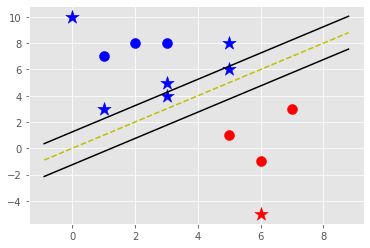

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        print("all_data = ")
        print(all_data)
        self.max_feature_value = max(all_data)
        print("self.max_feature_value = ")
        print(self.max_feature_value)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1]
                      # self.max_feature_value * 0.01]
                      # point of expense:
                      # self.max_feature_value * 0.001 

        
        
        # extremely expensive
        b_range_multiple = 5
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            print("np.arange (b ki range) = ")            
            print(np.arange(-1*(self.max_feature_value*b_range_multiple),
                               self.max_feature_value*b_range_multiple,
                               step*b_multiple))
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    print(2*"\n")
                    print("b")
                    print(b),
                    print(2*"\n")
                    for transformation in transforms:
                        w_t = w*transformation
                        print("\n")
                        print("w_t = ")
                        print(w_t)
                        print("\n")
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                print(found_option),
                                print("step = "+str(step))
                                print("self.max_feature_value = "+str(self.max_feature_value))    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                            print(opt_dict)
                            print(80*"#")
                            print(4*"\n")

                if w[0] < 0:
                    optimized = True
                    print(20*"\n")
                    print(60*"G")
                    print('Optimized a step.')
                    print(60*"G")
                    print(20*"\n")
                    
                else:
                    w = w - step
                    print(10*"\n")
                    print("step = "+str(step))
                    print("self.max_feature_value = "+str(self.max_feature_value))
                    print("w = " +str(w))
                    print(10*"\n")

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            print(40*"\n")
            print(60*"G")
            print("norms")
            print(norms)
            opt_choice = opt_dict[norms[0]]
            print("opt_choice")
            print(opt_choice)
            self.w = opt_choice[0]
            print("w =")
            print(self.w)
            self.b = opt_choice[1]
            print("b =")
            print(self.b)
            latest_optimum = opt_choice[0][0]+step*2
            print("step = ")
            print(step)
            print("latest_optimum = ")
            print(latest_optimum)
            print(60*"G")
            print(40*"\n")
                
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification
                          
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

        plt.show()
        
        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}
                
svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm.predict(p)

svm.visualize()

## Didnt take (self.max_feature_value * 0.01) or (self.max_feature_value * 0.001) as that would be way too big and would probably crash